# Part 3: Decision Trees

Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They are easy to understand, visualize, and implement. They are also the base model used for more advanced algorithms like random forest and gradient boosting.

## What is a Decision Tree? (Self-Study)

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a tree is known as the root node.

![decision-tree](../assets/decision-tree.png)

### How Does a Decision Tree Work?

A decision tree splits the data into subsets based on the value of input features. This process is repeated recursively, resulting in a tree with decision nodes and leaf nodes.

**Decision Node**

A decision node has two or more branches, each representing values for the attribute tested.

**Leaf Node**

A leaf node represents a class label (in classification) or a continuous value (in regression).

### Building a Decision Tree (Optional)

To build a decision tree, algorithms like ID3, C4.5, C5.0, and CART (Classification and Regression Trees) can be used. The most common algorithm used in `sklearn` is CART, which uses the **Gini impurity** or **entropy** as a criterion to create splits.

**Gini Impurity**

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

For a dataset with $ J $ classes, the Gini impurity of a node $ n $ is defined as:

$$ G(n) = 1 - \sum_{j=1}^{J} p_j^2 $$

where $ p_j $ is the fraction of items labeled with class $ j $ in the set.

- **Minimum (0)**: The Gini impurity is zero when all the samples in a node belong to a single class, indicating perfect purity.
- **Maximum ($1 - \frac{1}{J}$)**: The Gini impurity is maximized when the classes are evenly distributed across the node. For binary classification, this is when the classes are split 50/50 in a node, resulting in a Gini impurity of 0.5. For more classes, the maximum value decreases, reaching its theoretical maximum when each class has an equal probability.

![gini](../assets/gini.png)

**Entropy** 

Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. In the context of decision trees, it's used to quantify the impurity or disorder after a dataset is split on an attribute.

For a dataset with $ J $ classes, the entropy of a node $ n $ is defined as:

$$ H(n) = -\sum_{j=1}^{J} p_j \log_2(p_j) $$

where $ p_j $ is the proportion of the samples that belong to class $ j $.

- **Minimum (0)**: Entropy is zero when all samples at a node belong to the same class, which means there is no uncertainty or randomness.
- **Maximum ($ \log_2(J) $)**: Entropy is maximized when there is an equal number of samples from each class in the node, indicating the highest level of disorder or uncertainty. For binary classification, the maximum entropy is 1 (since $ \log_2(2) = 1 $). As the number of classes increases, the maximum possible entropy increases logarithmically.

### Information Gain

Information gain is based on the decrease in entropy after a dataset is split on an attribute. It is used to decide which attribute to split on at each step in building the tree.

For a dataset $ D $, split into subsets $ \{D_1, D_2, ..., D_k\} $ using feature $ A $, the information gain $ IG $ is defined as:

$$ IG(D, A) = H(D) - \sum_{i=1}^{k} \frac{|D_i|}{|D|} H(D_i) $$

| Symbol | Description |
|---|---|
|$ H(D) $ | entropy of the entire dataset |
|$ \|D_i\|/\|D\| $ | weight of the $ i $-th subset |
|$ H(D_i) $ | entropy of the $ i $-th subset |

### Advantages of Decision Trees

- Simple to understand and interpret.
- Requires little data preprocessing.
- Can handle both numerical and categorical data.

### Disadvantages of Decision Trees

- Prone to overfitting, especially with a lot of features.
- Can be unstable because small variations in the data might result in a completely different tree.

### Pruning a Decision Tree

Pruning is a technique used to reduce the size of decision trees by removing sections of the tree that provide little power in classifying instances. It reduces the complexity of the final classifier, hence reducing the risk of overfitting.

## Hands-On: Decision Tree Workflow (Practical)
Let's apply the Decision Tree workflow on titanic dataset. We can skip the preprocessing and train-test split steps are they are identical.

In [1]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# Generate predictions on the test set and evaluate the model's performance
# using a confusion matrix, accuracy, precision, recall, and F1 score.

titanic = sns.load_dataset('titanic')
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = titanic[features]
y = titanic[target]


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['age', 'sibsp', 'parch', 'fare']),
        ('cat', categorical_transformer, ['pclass', 'sex', 'embarked'])
    ])


In [3]:
# Define the model
model = DecisionTreeClassifier(criterion='gini', random_state=0)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
}

# Initialize GridSearchCV with the model, parameter grid, cross-validation strategy, and scoring metrics
# here we use f1 score as the metrics
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('grid_search', grid_search)
                          ])

In [4]:
# Split the data into training and testing sets. 
# Fit the full pipeline (preprocessing and model) on the training data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=0),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                                          'min_samples_leaf': [2, 4, 6, 8],
                                          'min_samples_split': [2, 4, 6, 8]},
                              scoring='f1', verbose=2))])

In [5]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best Score: 0.7463


In [6]:
# Predict class labels for the test set and compute performance metrics (Accuracy, Precision, Recall, F1).
# Also compute ROC curve points and the Area Under the Curve (AUC) using predicted probabilities.

preds = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [7]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.83
Precision: 0.87
Recall: 0.67
F1 Score: 0.75
AUC: 0.89


## Hands-On: Visualizing the Decision Tree (Practical)

Let's visualize the best decision tree model to better understand how it makes predictions.

In [8]:
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd

In [9]:
# Extract the best decision tree model from the pipeline
best_tree = grid_search.best_estimator_

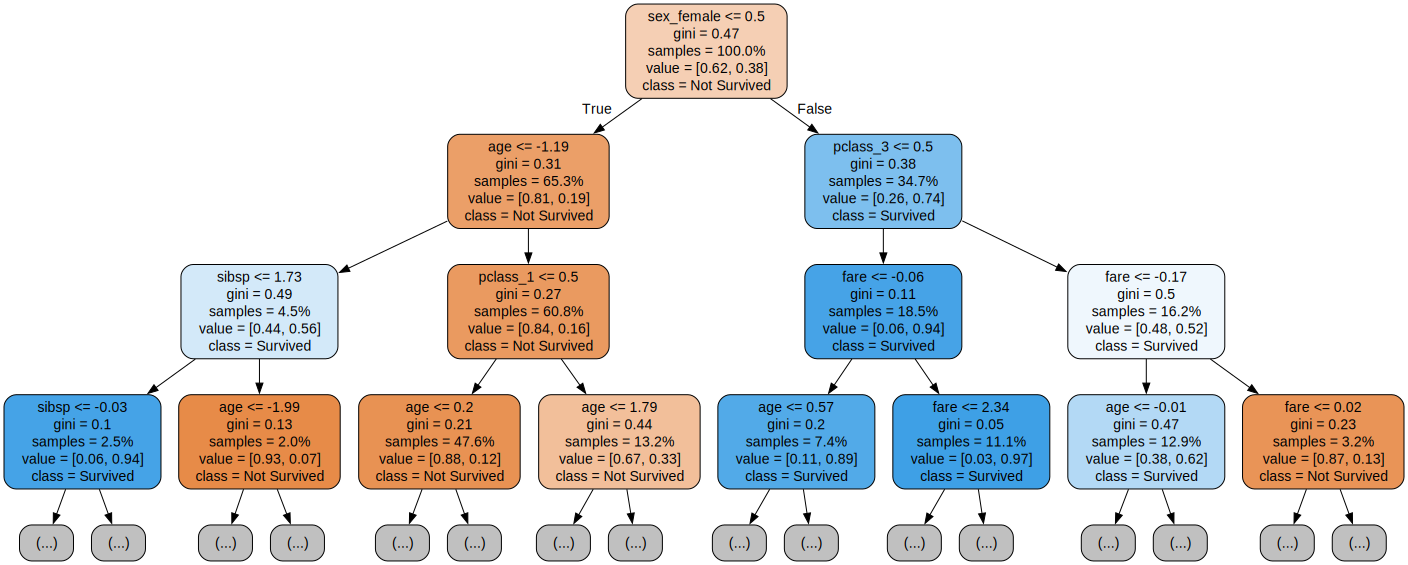

In [10]:
# Get feature names after preprocessing
# First, get the categorical feature names after one-hot encoding
cat_features = ['pclass', 'sex', 'embarked']
cat_transformer = preprocessor.named_transformers_['cat']
cat_encoder = cat_transformer.named_steps['onehot']
cat_feature_names = cat_encoder.get_feature_names_out(cat_features)

# Then, get the numerical feature names
num_features = ['age', 'sibsp', 'parch', 'fare']

# Combine all feature names
feature_names = list(num_features) + list(cat_feature_names)

# Export to DOT format
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=feature_names,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    max_depth=3,  # Limit depth for better visualization
    proportion=True,
    precision=2
)

# Create visualization
graph = graphviz.Source(dot_data, format="png")
graph